In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
# to avoid encoding error, using unicode_escape
data = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
# to check total number of rows and columns
data.shape

(11251, 15)

In [4]:
data.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# description of the dataFrame
data.describe(include='all')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251,11251,11251,11251,11251.000000,11251.000000,11251,11251,11251,11251,11251.000000,11239.000000,0.0,0.0
unique,NaN,1250,2351,2,7,NaN,NaN,16,5,15,18,NaN,NaN,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN,NaN,NaN
freq,NaN,42,53,7842,4543,NaN,NaN,1946,4296,1588,2655,NaN,NaN,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.421207,0.420318,NaN,NaN,NaN,NaN,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,NaN,NaN,NaN,NaN,12.754122,0.493632,NaN,NaN,NaN,NaN,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000,NaN,NaN


In [7]:
# use describe for specific columns
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [8]:
# drop unrelated columns
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
# to check null values
pd.isnull(data)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# drop null values
data.dropna(inplace=True)

In [12]:
data.shape

(11239, 13)

In [13]:
# change data type
data['Amount']= data['Amount'].astype('int')

In [14]:
data['Amount'].dtypes

dtype('int32')

In [15]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
# rename columns
data.rename(columns={'Product_Category':'Prod_cat'},inplace=True)
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Prod_cat,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


### Exploratory Data Analysis

#### Gender

In [17]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Prod_cat', 'Orders',
       'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

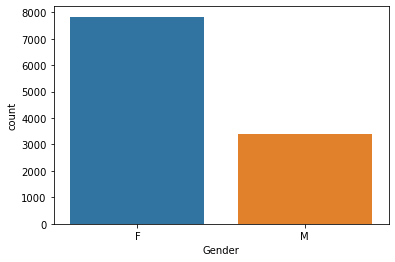

In [18]:
sns.countplot(x='Gender', data=data)

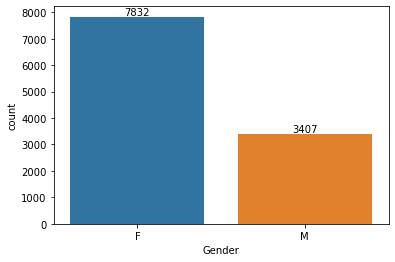

In [19]:
ax = sns.countplot(x='Gender', data=data)

for bars in ax.containers:
    ax.bar_label(bars)

In [20]:
 data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

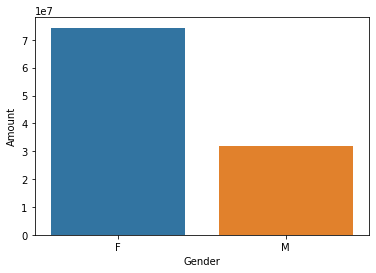

In [21]:
sales_gen = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x= 'Gender', y='Amount', data=sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

#### Age

In [22]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Prod_cat', 'Orders',
       'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Age Group', ylabel='count'>

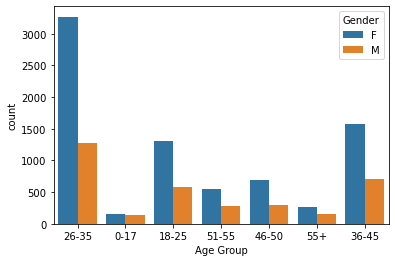

In [23]:
sns.countplot(data=data, x='Age Group', hue='Gender')

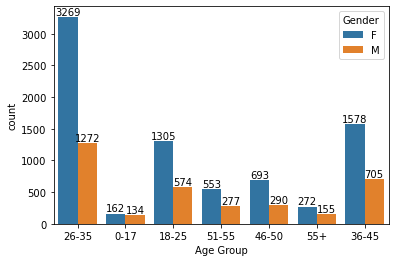

In [24]:
ax = sns.countplot(data=data, x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

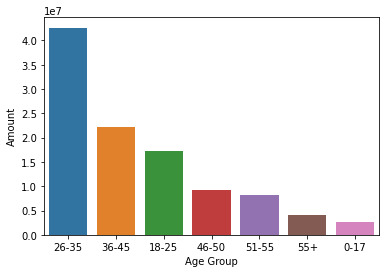

In [25]:
# Total Amount vs Age group
sales_age= data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x= 'Age Group', y='Amount', data=sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs are females 

#### State

<AxesSubplot:xlabel='State', ylabel='Orders'>

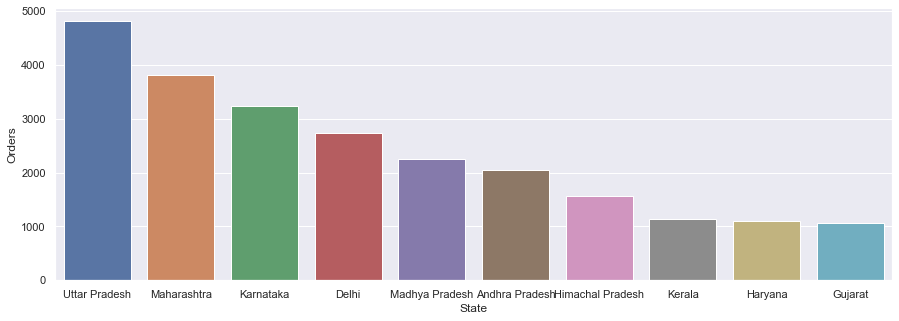

In [26]:
# Total number of orders from top 10 states
sales_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

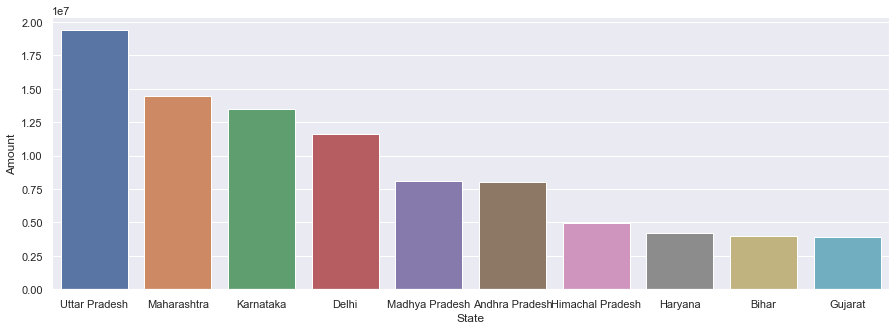

In [27]:
# Total sales from top 10 states
sales_state = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Amount')

From above graphs, we can see that unexpectedly most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### Marital Status

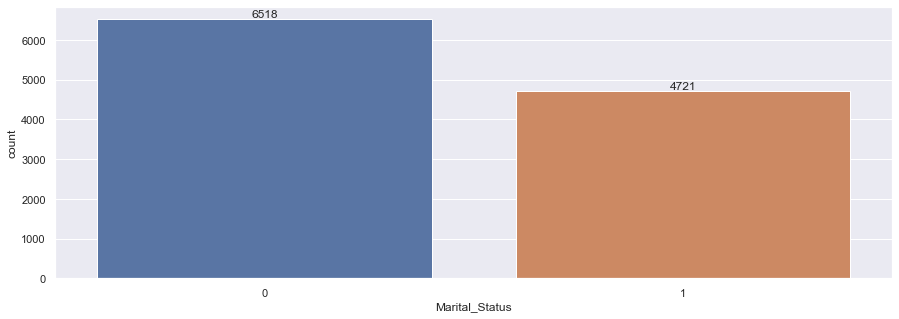

In [28]:
ax = sns.countplot(data= data, x= 'Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

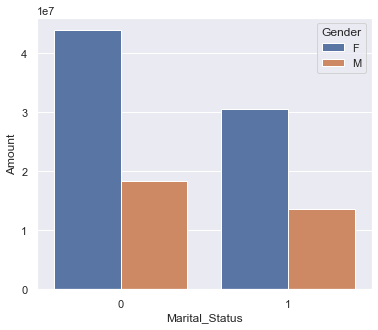

In [29]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graph, we can see that most of the buyers are married(females) and they have high purchasing power.

### Occupation

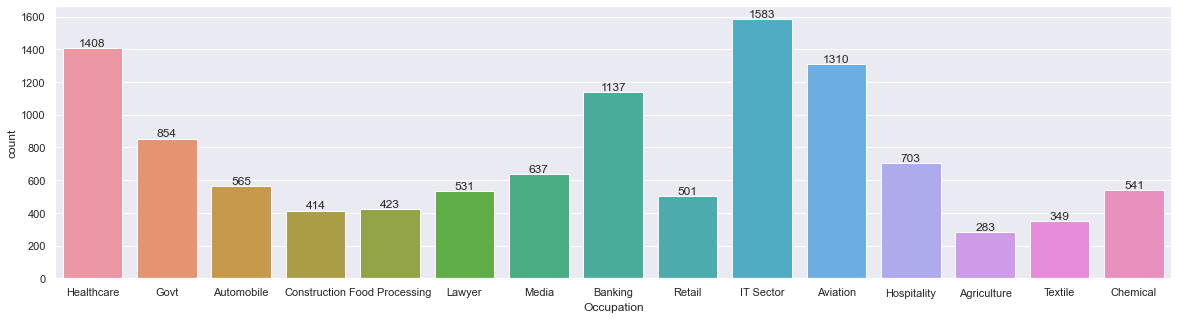

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data=data, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

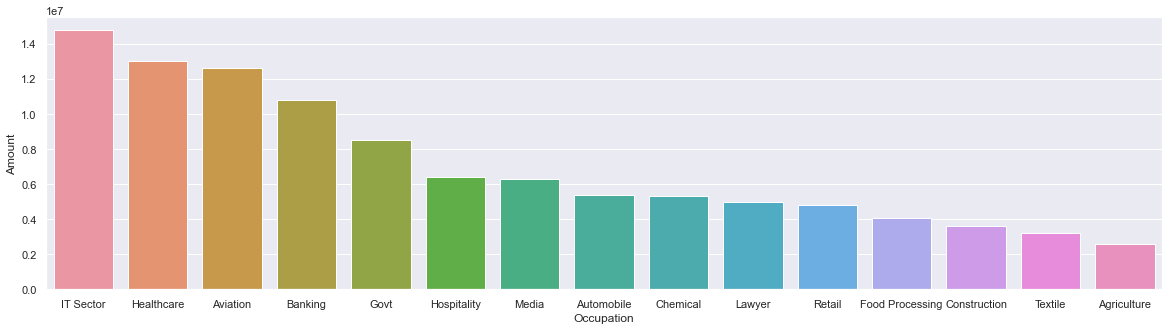

In [31]:
sales_state=data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount')

From above graphs, we get the insight that most of the buyers are working in IT, Aviation and Healthcare sector.

In [32]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Prod_cat', 'Orders',
       'Amount'],
      dtype='object')

### Product Category

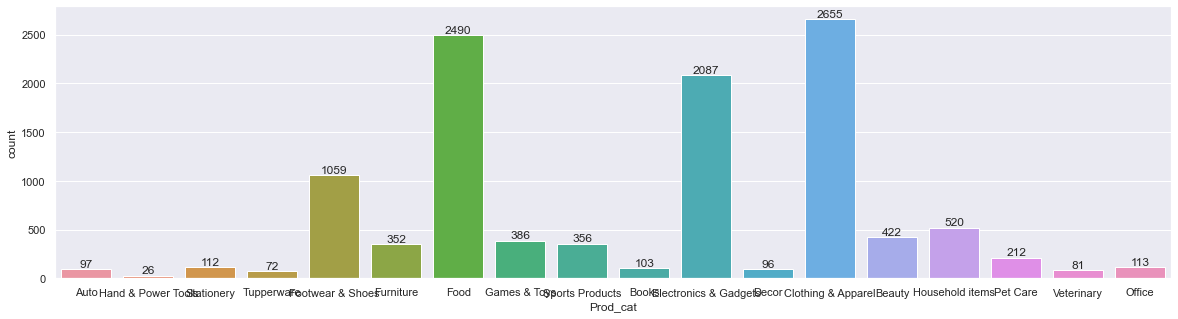

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=data, x='Prod_cat')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Prod_cat', ylabel='Amount'>

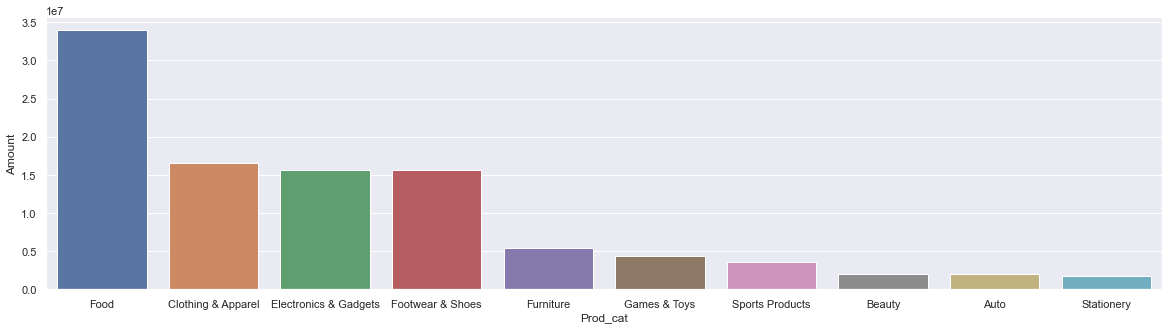

In [34]:
sales_state = data.groupby(['Prod_cat'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Prod_cat',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

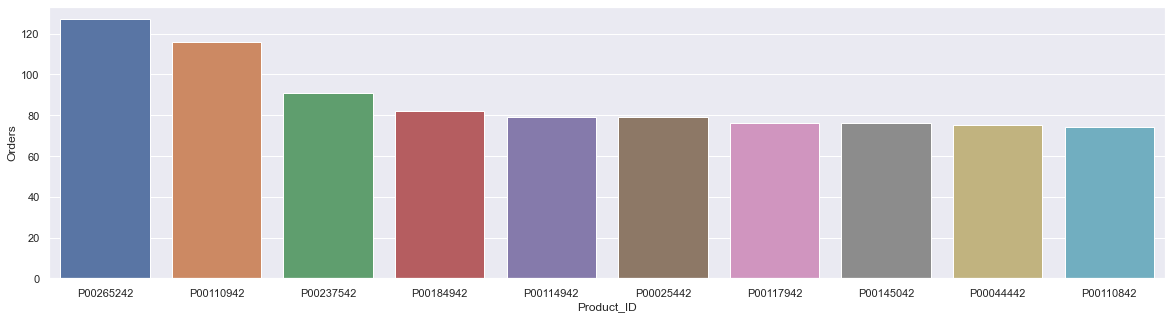

In [35]:
sales_state = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<AxesSubplot:xlabel='Product_ID'>

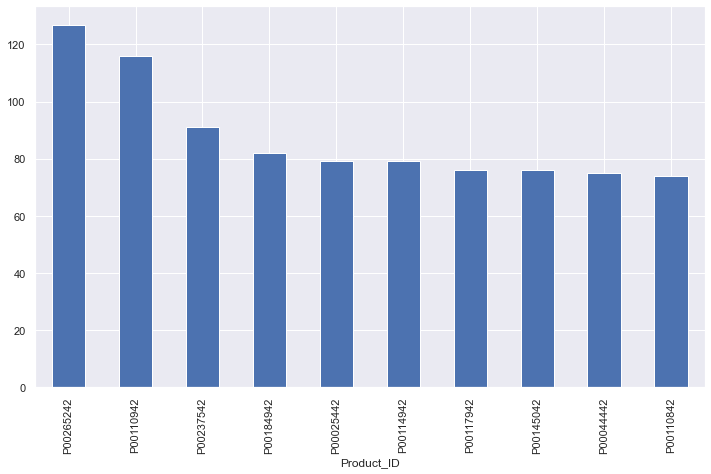

In [36]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.